### Step 1: Load the Data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [10]:
# Load the actual and predicted CSVs into pandas DataFrames
actual_df = pd.read_csv('./data/final/actual.csv')  # Actual values CSV file
predicted_df = pd.read_csv('./data/final/predicted.csv', skipinitialspace=True)  # Predicted values CSV file

In [11]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   personality_word   555 non-null    object
 1   total_likeability  555 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.8+ KB


In [12]:
predicted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   personality_word   555 non-null    object 
 1   total_likeability  555 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.8+ KB


In [13]:
# Step 1: Remove rows with NaN values from both datasets
actual_df_clean = actual_df.dropna()
predicted_df_clean = predicted_df.dropna()

# Step 2: Ensure both datasets have matching rows based on 'ID' column
common_ids = actual_df_clean['personality_word'].isin(predicted_df_clean['personality_word'])

# Filter the rows in both DataFrames based on the common IDs
actual_df_filtered = actual_df_clean[common_ids]
predicted_df_filtered = predicted_df_clean[common_ids]

actual_df = actual_df_filtered
predicted_df = predicted_df_filtered

In [14]:
actual_df

,personality_word,total_likeability
0,sincere,573
1,honest,555
2,understanding,549
3,loyal,547
4,truthful,545
...,...,...
550,dishonest,41
551,cruel,40
552,mean,37
553,phony,27


In [15]:
predicted_df

,personality_word,total_likeability
0,sincere,540.0
1,honest,580.0
2,understanding,530.0
3,loyal,550.0
4,truthful,570.0
...,...,...
550,dishonest,400.0
551,cruel,420.0
552,mean,430.0
553,phony,410.0


### Step 4: Evaluate the Regression Tasks

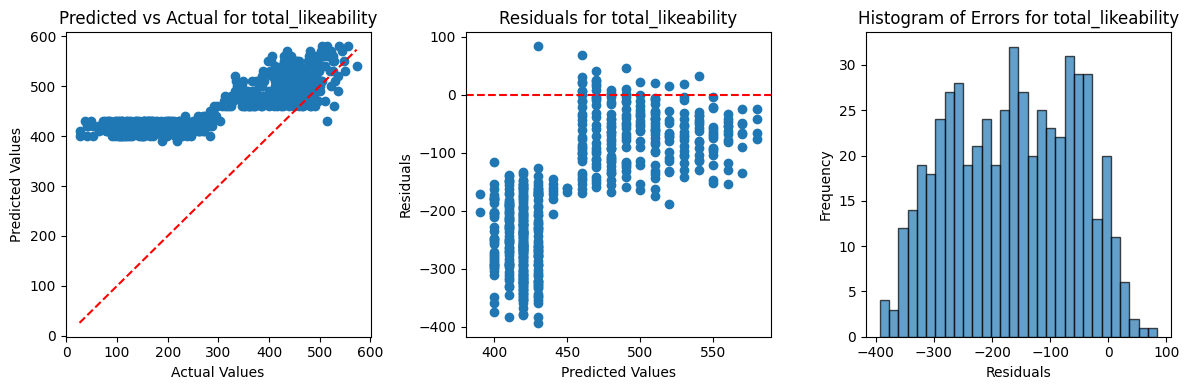

,Score Label,MAE,MSE,RMSE,R²,Adjusted R²,EVS,MedAE,Pearson Correlation,Spearman Correlation,Paired t-test p-value,Wilcoxon p-value
0,total_likeability,166.857923,38539.903461,196.315826,-0.806567,-0.80987,0.467245,162.0,0.863307,0.819021,1.987494e-147,7.203821e-89


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error
from scipy.stats import pearsonr, spearmanr, ttest_rel, wilcoxon
import numpy as np

# Function to calculate Adjusted R²
def adjusted_r2(y_actual, y_pred, n, p):
    """
    Calculates Adjusted R², which adjusts R² for the number of predictors in the model.
    This metric accounts for overfitting by penalizing for too many features.
    Formula: Adj R² = 1 - [(1 - R²) * (n - 1) / (n - p - 1)]
    """
    r2 = r2_score(y_actual, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

# Function to evaluate regression
def evaluate_regression(y_actual, y_pred, col):
    """
    Evaluates regression model performance using multiple metrics.
    Parameters:
        y_actual: Actual target values
        y_pred: Predicted target values
        col: Column name (score label) for identifying the metric
    
    Returns:
        A tuple of performance metrics
    """
    # MAE: Mean Absolute Error, average magnitude of errors
    mae = mean_absolute_error(y_actual, y_pred)  
    
    # MSE: Mean Squared Error, penalizes large errors more than MAE
    mse = mean_squared_error(y_actual, y_pred)  
    
    # RMSE: Root Mean Squared Error, interpretable in the same units as the target variable
    rmse = np.sqrt(mse)  
    
    # R²: Coefficient of Determination, indicates how well the model explains the variance
    r2 = r2_score(y_actual, y_pred)  
    
    # Adjusted R²: Adjusts R² for the number of features in the model
    adj_r2 = adjusted_r2(y_actual, y_pred, len(y_actual), 1)  # Assuming a single predictor for simplicity
    
    # EVS: Explained Variance Score, measures the proportion of variance explained by the model
    evs = explained_variance_score(y_actual, y_pred)  
    
    # MedAE: Median Absolute Error, robust to outliers
    medae = median_absolute_error(y_actual, y_pred)  
    
    return mae, mse, rmse, r2, adj_r2, evs, medae

# Define the list of columns you're evaluating (can be the columns of your predicted_df)
columns_to_evaluate = ['total_likeability']

# Initialize an empty list to store the evaluation results
evaluation_results = []

# Set up the figure for grid plots (1 row, 3 columns for each model metric)
n_features = len(columns_to_evaluate)
fig, axes = plt.subplots(n_features, 3, figsize=(12, 4 * n_features))

# If there is only one column to evaluate, axes will be 1D, so reshape it to 2D
if n_features == 1:
    axes = axes.reshape(1, 3)

# Loop through each column and evaluate
for i, col in enumerate(columns_to_evaluate):
    y_actual = actual_df[col]  # Actual target values for the column
    y_pred = predicted_df[col]  # Predicted values for the column
    
    # Call the evaluate_regression function and get the metrics
    mae, mse, rmse, r2, adj_r2, evs, medae = evaluate_regression(y_actual, y_pred, col)
    
    # Calculate Pearson and Spearman correlations
    pearson_corr, _ = pearsonr(y_actual, y_pred)  # Pearson Correlation: linear relationship
    spearman_corr, _ = spearmanr(y_actual, y_pred)  # Spearman Correlation: monotonic relationship
    
    # Paired t-test: Tests whether the means of the actual and predicted values are significantly different
    t_stat, p_val_ttest = ttest_rel(y_actual, y_pred)
    
    # Wilcoxon Signed Rank Test: Non-parametric test to compare paired samples
    stat, p_val_wilcoxon = wilcoxon(y_actual, y_pred)
    
    # Append the evaluation results
    evaluation_results.append({
        'Score Label': col,
        'MAE': mae,  # Mean Absolute Error
        'MSE': mse,  # Mean Squared Error
        'RMSE': rmse,  # Root Mean Squared Error
        'R²': r2,  # R-squared
        'Adjusted R²': adj_r2,  # Adjusted R-squared
        'EVS': evs,  # Explained Variance Score
        'MedAE': medae,  # Median Absolute Error
        'Pearson Correlation': pearson_corr,  # Pearson correlation coefficient
        'Spearman Correlation': spearman_corr,  # Spearman correlation coefficient
        'Paired t-test p-value': p_val_ttest,  # Paired t-test p-value
        'Wilcoxon p-value': p_val_wilcoxon  # Wilcoxon Signed Rank Test p-value
    })
    
    # Plotting the model's performance
    ax = axes[i, 0]
    ax.scatter(y_actual, y_pred)  # Scatter plot: Actual vs Predicted
    ax.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'r--')  # Diagonal line for perfect predictions
    ax.set_title(f'Predicted vs Actual for {col}')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    
    # Residuals plot (errors between actual and predicted values)
    residuals = y_actual - y_pred
    ax = axes[i, 1]
    ax.scatter(y_pred, residuals)  # Scatter plot of residuals
    ax.axhline(y=0, color='r', linestyle='--')  # Line at y=0 for easy identification of bias
    ax.set_title(f'Residuals for {col}')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    
    # Histogram of errors (residuals)
    ax = axes[i, 2]
    ax.hist(residuals, bins=30, edgecolor='black', alpha=0.7)  # Histogram of residuals
    ax.set_title(f'Histogram of Errors for {col}')
    ax.set_xlabel('Residuals')
    ax.set_ylabel('Frequency')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

# Convert the evaluation results into a pandas DataFrame for better readability
evaluation_df = pd.DataFrame(evaluation_results)

# Display the evaluation results
display(evaluation_df)

# Save the evaluation results to a CSV file for later use
# evaluation_df.to_csv("evaluation_results.csv", index=False)
